In [ ]:
# Code to produce a plot of Luminsosity at 150 MHz vs redshift.

In [ ]:
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
from astropy.cosmology import Planck15,z_at_value
import astropy.units as u
import csv

In [ ]:
# initialise files for import/plotting (Only Radio Galaxies all else removed)

hzrg_3c=np.genfromtxt('drouart 3c.csv',delimiter=",",usecols=(1,2,6,8),names=True,dtype=None)
hzrg_6c=np.genfromtxt('drouart 6c.csv',delimiter=",",usecols=(1,2,4,6,8),names=True,dtype=None)
hzrg_sample=np.genfromtxt('drouart hzrgs.csv',delimiter=",",usecols=(1,2,6,8),names=True,dtype=None)
hzrg_saxena=np.genfromtxt('Saxena data.csv',delimiter=",",usecols=(1,2,6,4,8),names=True,dtype=None)
hzrg_drouart=np.genfromtxt('drouart 2020.csv',delimiter=",",usecols=(1,2,4,6,8),names=True,dtype=None)

In [ ]:
def L1400(redshift, flux, alpha):
    for value in redshift:
        try:
            flux=flux * 1e-29 *(u.W / (u.m*u.m) / u.Hz) #convert flux from mJy to W/m^2/Hz
            redshift = redshift * u.dimensionless_unscaled
            dL = Planck15.luminosity_distance(redshift).to(u.m) #convert Mpc to metres
            alpha=alpha * u.dimensionless_unscaled
            lum_1400 = 4.*np.pi*dL*dL*flux*((1+redshift)**-(1+alpha))
            return lum_1400
        except:
            continue
            
def S150(S1400,alpha):
    for value in S1400:
        try:
#            S1400=S1400 * 1e-29 *(u.W / (u.m*u.m) / u.Hz) #convert S_1400 flux from mJy to W/m^2/Hz
#            alpha=alpha * u.dimensionless_unscaled
            S_150 = S1400*(150/1400)**alpha # extrapolate S150 from S1400 and alpha values (Dimensionless)
            return S_150
        except:
            continue

def L150(redshift, S150, alpha): 
    for value in S150:
        try:
            redshift = redshift * u.dimensionless_unscaled
            S150= S150 * 1e-29 *(u.W / (u.m*u.m) / u.Hz) #convert flux from mJy to W/m^2/Hz
            dL = Planck15.luminosity_distance(redshift).to(u.m) #convert Mpc to metres
            lum_150 = 4.*np.pi*dL*dL*S150*((1+redshift)**-(1+alpha))
            return lum_150
        except:
            continue

In [ ]:
# Variables for 3C objects
z_3c = hzrg_3c['z']
s1400_3c = hzrg_3c['S1400']
alpha_3c = hzrg_3c['alpha']
K_3c = hzrg_3c['K']
s150_3c = S150(s1400_3c,alpha_3c) # extrapolate S_150
L150_3c = L150(z_3c,s150_3c,alpha_3c) # calc L_500

# Variables for 6C objects
z_6c = hzrg_6c['z']
s150_6c = hzrg_6c['S150'] # pull S150 from file
s1400_6c = hzrg_6c['S1400']
alpha_6c = hzrg_6c['alpha']
K_6c = hzrg_6c['K']
L150_6c = L150(z_6c,s150_6c,alpha_6c)

# Variables for 'hzrg' objects
z_hzrg = hzrg_sample['z']
s1400_hzrg = hzrg_sample['S1400']
alpha_hzrg = hzrg_sample['alpha']
K_hzrg = hzrg_sample['K']
s150_hzrg = S150(s1400_hzrg,alpha_hzrg) #extrapolate S_150
L150_hzrg = L150(z_hzrg,s150_hzrg,alpha_hzrg)

# Variables for Saxena objects
z_sax = hzrg_saxena['z']
s150_sax = hzrg_saxena['S150'] # pull S150 from file
s1400_sax = hzrg_saxena['S1400']
alpha_sax = hzrg_saxena['alpha']
K_sax = hzrg_saxena['K']
L150_sax = L150(z_sax,s150_sax,alpha_sax)

# Variables for Drouart objects
z_drouart = hzrg_drouart['z']
s150_drouart = hzrg_drouart['S150'] #pull from file
s1400_drouart = hzrg_drouart['S1400']
alpha_drouart = hzrg_drouart['alpha']
K_drouart = hzrg_drouart['K']
L150_drouart = L150(z_drouart,s150_drouart,alpha_drouart)

In [ ]:
# calculate marker sizes based on alpha

alpha_threshold = -1.2 * u.dimensionless_unscaled

Lmarker1 = [60 if (np.abs(value) - np.abs(alpha_threshold)) > 0 else 10 for value in alpha_3c]
Lmarker2 = [60 if (np.abs(value) - np.abs(alpha_threshold)) > 0 else 10 for value in alpha_6c]
Lmarker3 = [60 if (np.abs(value) - np.abs(alpha_threshold)) > 0 else 10 for value in alpha_hzrg]
Lmarker4 = [60 if (np.abs(value) - np.abs(alpha_threshold)) > 0 else 10 for value in alpha_sax]
Lmarker5 = [60 if (np.abs(value) - np.abs(alpha_threshold)) > 0 else 10 for value in alpha_drouart]

In [ ]:
# new source:  MG 1131+0456, K=17.8(Vega), so 17.8(+1.85) in AB
# z=1.849 (unpublished)
# S1400 = 527 mJy (0.527 Jy), S178 = 2300 mJy (2.3 Jy)
# Ref: http://ned.ipac.caltech.edu/byname?objname=MG%201131%2B0456&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

MG1131_K=17.8+1.85
MG1131_z=1.849 * u.dimensionless_unscaled
MG1131_S1400=527 * 1e-29 *(u.W / (u.m*u.m) / u.Hz) #convert flux from mJy to W/m^2/Hz
MG1131_alpha=-0.75 * u.dimensionless_unscaled # i think???

#calculate L150 MHz
dL_MG1131 = Planck15.luminosity_distance(MG1131_z).to(u.m) #convert Mpc to metres
MG1131_S150 = MG1131_S1400*(150/1400)**MG1131_alpha
MG1131_L150 = 4.*np.pi*dL_MG1131*dL_MG1131*MG1131_S150*((1+MG1131_z)**-(1+MG1131_alpha))

Lmarker_MG1131=[60 if (np.abs(MG1131_alpha) - np.abs(alpha_threshold)) > 0 else 10]

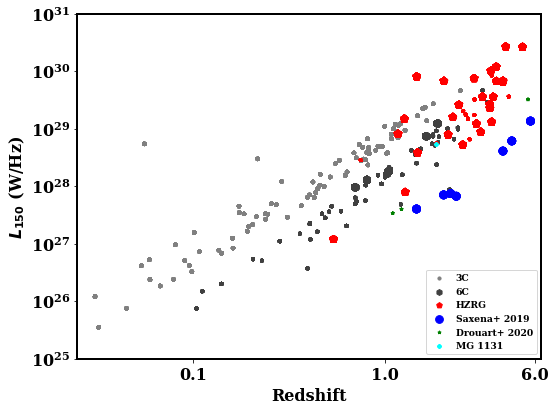

In [ ]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelweight'] = 600
plt.rcParams['axes.titlesize'] = 'x-large'

# plot each data set
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
plt.yscale('log')
plt.xscale('log')

from astropy import visualization
visualization.quantity_support()
    
#plot 3C data
label1 = False
for value in Lmarker1:
    if not label1:
        ax.scatter(hzrg_3c['z'],L150_3c, s=[Lmarker1], c='0.5', facecolors='none', label='3C')
        label1 = True
    else:
        ax.scatter(hzrg_3c['z'],L150_3c, s=[Lmarker1], c='0.5', facecolors='none')

# plot 6C data
label2 = False
for value in Lmarker2:
    if not label2:
        ax.scatter(hzrg_6c['z'],L150_6c, marker='h', c='0.25', s=[Lmarker2], label='6C')
        label2 = True
    else:
        ax.scatter(hzrg_6c['z'],L150_6c, marker='h', c='0.25', s=[Lmarker2])

# plot hzrg sample
label3=False     
for value in Lmarker3:
    if not label3:
        ax.scatter(hzrg_sample['z'],L150_hzrg, marker='p', color='red', s=[Lmarker3],label='HZRG')
        label3=True
    else:
        ax.scatter(hzrg_sample['z'],L150_hzrg, marker='p', color='red', s=[Lmarker3])

#plot Saxena sources
label4=False
for value in Lmarker4:
    if not label4:
        ax.scatter(hzrg_saxena['z'],L150_sax, marker='o', color='blue', s=[Lmarker4],label='Saxena+ 2019')
        label4=True
    else:
        ax.scatter(hzrg_saxena['z'],L150_sax, marker='o', color='blue', s=[Lmarker4])

# plot Druart sources
label5=False
for value in Lmarker5:
    if not label5:
        ax.scatter(hzrg_drouart['z'],L150_drouart, marker='*', color='green', s=[Lmarker5],label='Drouart+ 2020')
        label5=True
    else:
        ax.scatter(hzrg_drouart['z'],L150_drouart, marker='*', color='green', s=[Lmarker5])
            
# Plotting MG 1131+0456
ax.scatter(MG1131_z,MG1131_L150, s=Lmarker_MG1131, marker='x', color='cyan', label='MG 1131')
    
# format x-axis 
plt.xlim([0.025, 6.5])
#plt.xlim([1, 6.5])
plt.minorticks_off()
#plt.xticks([1, 2, 3, 4, 5, 6])
plt.xticks([0.1, 1, 6])
plt.xlabel('Redshift')

#format y-axis
plt.ylim(1e25, 1e31)
plt.ylabel('$L_{150}$ (W/Hz)')

# remove scientific notation from x-axis
from matplotlib.ticker import ScalarFormatter
sf = ScalarFormatter()
sf.set_scientific(False)
ax.xaxis.set_major_formatter(sf)

# format legend
plt.legend(loc = 'lower right', fontsize= 'xx-small')

#show plot and save as pdf
fig1 = plt.gcf()
fig1.tight_layout()
fig1.savefig('Redshift-L150-alpha.pdf', dpi=500)

plt.show()